In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os

# Change 'Your_Folder_Name' to the folder where your dataset is stored
Path = '/content/drive/My Drive/audio'
os.chdir(Path)


In [13]:
!pip install librosa matplotlib numpy tensorflow


In [28]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [29]:
def preprocess_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfccs.T  # Transpose to get the correct shape



In [38]:
def preprocess_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs = np.mean(mfccs.T, axis=0)
    return mfccs

def load_dataset(data_dir):
    features = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                if file_path.endswith('.wav'):
                    print(f'Processing file: {file_path}')  # Add this line
                    mfccs = preprocess_audio(file_path)
                    features.append(mfccs)
                    labels.append(label)
    return np.array(features), np.array(labels)

data_dir = '/content/drive/My Drive/audio'  # Update this path
X, y = load_dataset(data_dir)

print(f'Loaded {len(X)} samples with {len(y)} labels')

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape}, Testing samples: {X_test.shape}')


Processing file: /content/drive/My Drive/audio/FAKE/ryan-original.wav
Processing file: /content/drive/My Drive/audio/FAKE/taylor-original.wav
Processing file: /content/drive/My Drive/audio/FAKE/trump-original.wav
Processing file: /content/drive/My Drive/audio/FAKE/Obama-to-Trump.wav
Processing file: /content/drive/My Drive/audio/FAKE/obama-to-taylor.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-linus.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-biden.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-margot.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-musk.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-taylor.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-obama.wav
Processing file: /content/drive/My Drive/audio/FAKE/ryan-to-trump.wav
Processing file: /content/drive/My Drive/audio/FAKE/taylor-to-biden.wav
Processing file: /content/drive/My Drive/audio/FAKE/taylor-to-linus.wav
Processin

In [42]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(40,), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               5248      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13569 (53.00 KB)
Trainable params: 13569 (53.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


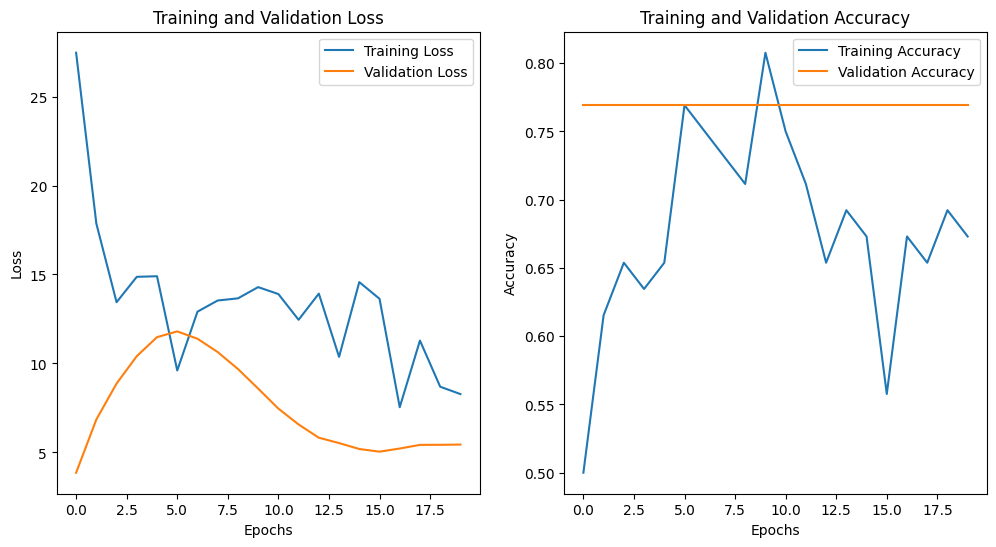

In [40]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

plot_history(history)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               5248      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13569 (53.00 KB)
Trainable params: 13569 (53.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
2/2 [==

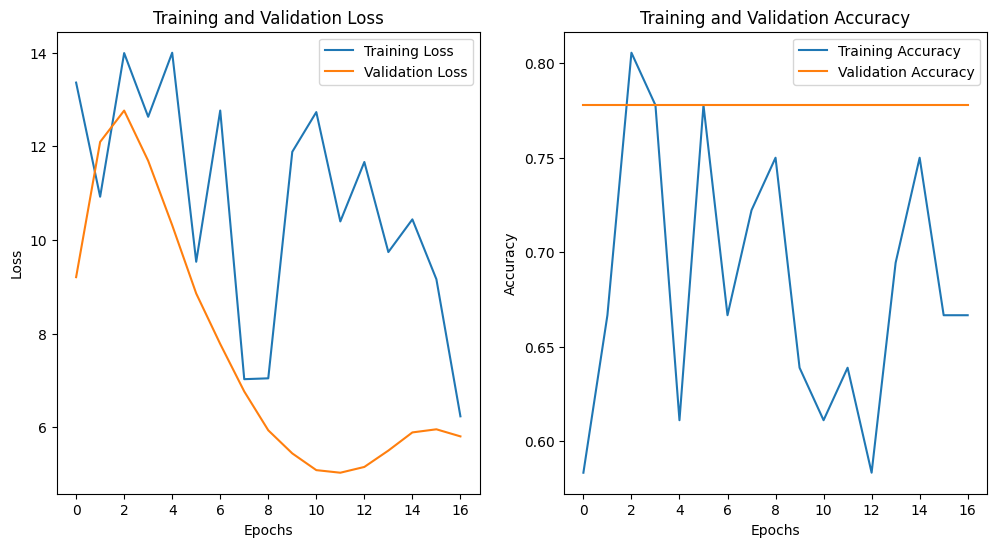

1/1 [==============================] - 0s 73ms/step
Prediction: Real


In [46]:
# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(40,), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Define early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/audio/real', save_best_only=True, monitor='val_loss')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Verify if the model has been saved
print(os.listdir('/content/drive/My Drive/audio'))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

plot_history(history)

# Load the best model
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/audio/real')

# Make predictions
new_audio_path = '/content/drive/My Drive/audio/linus-to-obama.wav'

if not os.path.exists(new_audio_path):
    print(f"File not found: {new_audio_path}")
else:
    new_features = preprocess_audio(new_audio_path)
    new_features = np.expand_dims(new_features, axis=0)

    prediction = loaded_model.predict(new_features)
    print(f'Prediction: {"Fake" if prediction[0] > 0.5 else "Real"}')

In [47]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [48]:
import streamlit as st
import numpy as np
import librosa
import tensorflow as tf

# Function to preprocess audio
def preprocess_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs = np.mean(mfccs.T, axis=0)
    return mfccs

# Load the trained model
model_path = '/content/drive/My Drive/audio'  # Update this path
model = tf.keras.models.load_model(model_path)

# Streamlit app
st.title("Audio Deepfake Detection")

# File uploader
uploaded_file = st.file_uploader("Choose an audio file", type=["wav"])

if uploaded_file is not None:
    # Save the uploaded file to a temporary file
    with open("temp_audio.wav", "wb") as f:
        f.write(uploaded_file.getbuffer())

    # Preprocess the audio file
    features = preprocess_audio("temp_audio.wav")
    features = np.expand_dims(features, axis=0)

    # Make prediction
    prediction = model.predict(features)
    result = "Fake" if prediction[0] > 0.5 else "Real"

    # Display result
    st.write(f"Prediction: {result}")


2024-07-18 21:07:08.767 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [49]:
streamlit run app.py


SyntaxError: invalid syntax (<ipython-input-49-718866ff34b9>, line 1)